<a href="https://colab.research.google.com/github/doffn/colors/blob/main/red_green_sorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building a model to predict Red Tomatos using tensorflow**

## Chapter 1: Getting The model ready

This file is a github file that includes functions like unziping, plotting loss curve and other functions.  

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-21 21:00:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-21 21:00:52 (45.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import *

### Unzipping the data to build the model

In [3]:
!wget https://github.com/doffn/colors/raw/main/colors.zip

--2024-01-21 21:01:00--  https://github.com/doffn/colors/raw/main/colors.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/doffn/colors/main/colors.zip [following]
--2024-01-21 21:01:00--  https://raw.githubusercontent.com/doffn/colors/main/colors.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546427 (534K) [application/zip]
Saving to: ‘colors.zip’

colors.zip          100%[===================>] 533.62K  --.-KB/s    in 0.05s   

2024-01-21 21:01:00 (10.3 MB/s) - ‘colors.zip’ saved [546427/546427]



In [4]:
unzip_data("colors.zip")

### Data Splitting, Directory Creation and Data visualization
bold text


### Data Splitting

This Python script is designed to organize image data into training and testing sets for a machine learning model. It utilizes the `os`, `shutil`, and `sklearn` libraries.

1. **Importing Libraries:**
   - `os` and `shutil` are used for file and directory operations.
   - `train_test_split` from `sklearn.model_selection` is employed for splitting the dataset.

2. **Data Initialization:**
   - Two empty lists, `data` and `labels`, are created to store image file paths and corresponding labels.

3. **Iterating Through Classes:**
   - The script iterates through each class folder in the "colors" directory.

4. **Collecting Image Paths:**
   - For each class, it collects the file paths of images in the class folder.

5. **Data Splitting and Directory Creation:**
   - If there are images in the class folder, it splits the file paths into training and testing sets using `train_test_split`.
   - For each class, it creates target directories (`data/train/{class_folder}` and `data/test/{class_folder}`) if they don't exist.
   - It then copies the training set images to the corresponding training directory and testing set images to the testing directory using `shutil.copy`.

## Note
- The script assumes that the "colors" directory contains subdirectories for each class, and each class folder contains image files.
- The data is split into 80% training and 20% testing sets for each class.

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split
data = []
labels = []

for class_folder in os.listdir("colors"):
    files = []
    class_path = os.path.join("colors", class_folder)
    for image_path in os.listdir(class_path):
        image = os.path.join(class_path, image_path)
        files.append(image)
    if len(files) >0:
        data.append(files)
        for i in data:
            x_train, x_test= train_test_split(files, test_size=0.2, random_state=42)
            target_dir = f"data/train/{class_folder}"
            os.makedirs(target_dir, exist_ok=True)  # Create the target directory
            for filename in x_train:
                shutil.copy(filename, target_dir)

            target_dir = f"data/test/{class_folder}"
            os.makedirs(target_dir, exist_ok=True)  # Create the target directory
            for filename in x_test:
                shutil.copy(filename, target_dir)


In [6]:
walk_through_dir("data")

There are 2 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 31 images in 'data/train/Red'.
There are 0 directories and 27 images in 'data/train/Green'.
There are 2 directories and 0 images in 'data/test'.
There are 0 directories and 8 images in 'data/test/Red'.
There are 0 directories and 7 images in 'data/test/Green'.


### Getting the class names for the model.

In [7]:
# get the class name programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Green' 'Red']


### Random Image Visualization

This Python script uses `matplotlib` to visualize a randomly selected image from a specified directory and class. It defines a function `view_random_image` that takes the target directory and class as parameters.


1. **Importing Libraries:**
   - `matplotlib.pyplot` and `matplotlib.image` are imported for image visualization.
   - The `random` module is used for random sampling.

2. **Function Definition:**
   - `view_random_image` takes `target_dir` (directory path) and `target_class` (class name) as inputs.

3. **Setting Target Folder:**
   - The function sets the target folder path by combining `target_dir` and `target_class`.

4. **Random Image Selection:**
   - It randomly selects an image path from the target folder using `random.sample`.

5. **Image Reading and Plotting:**
   - Reads the selected image using `mpimg.imread` and plots it using `plt.imshow`.
   - Displays the class name as the plot title, and turns off axis visibility.

6. **Image Shape Display:**
   - Prints the shape of the selected image using `img.shape`.

7. **Return:**
   - Returns the image object.



In [8]:
# let's visualize the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # set the target class
  target_folder = target_dir + target_class
  # get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #print(np.shape(random_image))
  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape} ") #show the shape of the image
  return img

image shape: (168, 299, 3) 


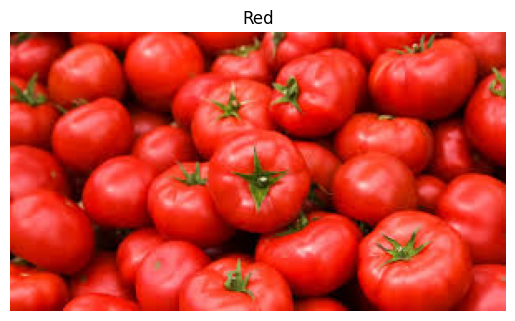

In [9]:
img = view_random_image(target_dir="data/train/", target_class=class_names[1])

# Chapter 2:  Building and Predicting using a Tensorflow model

## Convolutional Neural Network (CNN) Model


This Python script utilizes TensorFlow and Keras to build and compile a Convolutional Neural Network (CNN) for image classification.

1. **Importing Libraries:**
   - Importing necessary modules from TensorFlow, including the Sequential model, Conv2D, MaxPooling2D, Flatten, Dense layers, and ImageDataGenerator for data preprocessing.

2. **Setting Seed and Data Preprocessing:**
   - Setting a random seed for reproducibility.
   - Using ImageDataGenerator to preprocess and normalize pixel values between 0 and 1 for both training and validation datasets.

3. **Data Directory Setup:**
   - Defining directories for training and testing datasets.

4. **Loading and Batching Data:**
   - Using `flow_from_directory` to load and batch training and validation data, specifying batch size, target size, and class mode.

5. **Model Architecture:**
   - Creating a Sequential model.
   - Adding a convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation.
   - Adding a max-pooling layer with a 2x2 pool size.
   - Adding another convolutional layer with 64 filters and a 3x3 kernel.
   - Adding another max-pooling layer.
   - Flattening the output for dense layers.
   - Adding a dense layer with 128 units and 'relu' activation.
   - Adding the output layer with 1 unit and 'sigmoid' activation for binary classification.

6. **Model Compilation:**
   - Compiling the model using the 'adam' optimizer and binary crossentropy loss.
   - Metrics for evaluation are set to accuracy.

7. **Model Summary:**
   - Displaying a summary of the model architecture.

8. **Model Fitting:**
   - Training the model using the training datas and also validating it using the validation data.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()


Found 58 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                          

In [11]:
import tensorflow as tf
history = model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data),)

Epoch 1/5
2/2 [==============================] - 20s 7s/step - loss: 1.6314 - accuracy: 0.6207 - val_loss: 8.1834 - val_accuracy: 0.4667
Epoch 2/5
2/2 [==============================] - 11s 5s/step - loss: 5.5010 - accuracy: 0.4828 - val_loss: 0.0802 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 5s 3s/step - loss: 0.6445 - accuracy: 0.8276 - val_loss: 0.4578 - val_accuracy: 0.8667
Epoch 4/5
2/2 [==============================] - 6s 3s/step - loss: 0.1560 - accuracy: 0.9483 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 5s 3s/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.4815 - val_accuracy: 0.9333


## Evaluating the model

In [12]:
model1.evaluate(valid_data)

1/1 [==============================] - 1s 537ms/step - loss: 0.4815 - accuracy: 0.9333


[0.48154446482658386, 0.9333333373069763]

## Plotting the loss curves

This is a function inside the helper function. It helps us to visualize the models loss and accuracy curve.

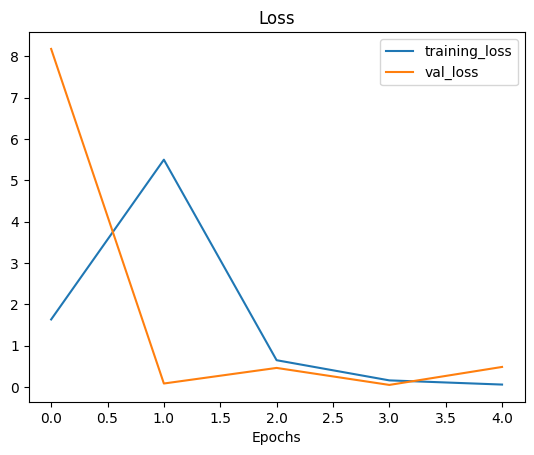

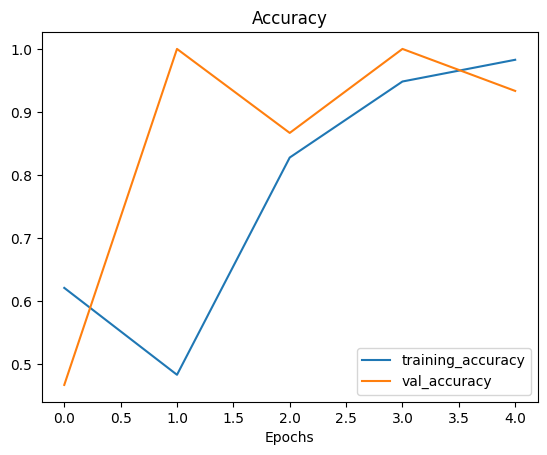

In [13]:
plot_loss_curves(history)

# Chapter 4: Making prediction on an alien image

In [14]:
!wget "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s"

--2024-01-21 21:02:10--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.215.138, 173.194.215.100, 173.194.215.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7174 (7.0K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s’

images?q=tbn:ANd9Gc 100%[===================>]   7.01K  --.-KB/s    in 0s      

2024-01-21 21:02:10 (47.0 MB/s) - ‘images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s’ saved [7174/7174]



## Creating a function to import an image reshape and resize it

In [15]:
def image_pred_load(filename, img_shape=224):
  """it will import an image and resize and reshape it"""
  # read the image
  img = tf.io.read_file(filename)
  # Decode the image data into tensor
  img = tf.image.decode_image(img)
  print("Initial shape: ", img.shape)
  img = tf.image.resize(img, [img_shape, img_shape])
  # rescale the model(normalize it)
  img = img/255.
  print("Scalled shape: ", img.shape)

  #after adding a dims
  img = tf.expand_dims(img, axis=0)
  print("Dims shape: ", img.shape)
  return img

## Creating a function that will predict and plot for a multiclass

In [16]:
def pred_and_plot(model, filename, class_names=class_names):
  """it will import, predict, plot based on the image"""
  # this will do the preprocessing
  image_pred_load(filename, img_shape=224)
  # this will predict on the model
  predict_1 = image_pred_load(filename)
  result = model.predict(predict_1)
  # add in logic for multiclass
  print(result)
  pred_class = class_names[int(tf.round(result[0]))]

  # draw it
  image_file = mpimg.imread(filename)
  plt.imshow(image_file)
  plt.title("The model has predicted "+ pred_class)
  plt.axis(False)

Initial shape:  (148, 214, 3)
Scalled shape:  (224, 224, 3)
Dims shape:  (1, 224, 224, 3)
Initial shape:  (148, 214, 3)
Scalled shape:  (224, 224, 3)
Dims shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 199ms/step
[[9.216098e-05]]


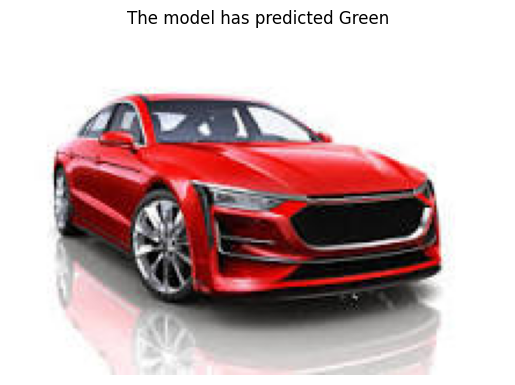

In [17]:
pred_and_plot(model1, "/content/images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s")

# Chapter 5: Model Quantization with TensorFlow



## Quantizing a TensorFlow model using the TensorFlow Model Optimization library.


1. **Importing Libraries:**
   - Importing `tensorflow_model_optimization` and TensorFlow modules, including the Keras model loader.

2. **Quantization-Aware Training:**
   - Wrapping the original model (`model1`) with quantization-aware training using `tfmot.quantization.keras.quantize_model`.
   - Compiling the quantization-aware model with a customized learning rate.

3. **Training the Quantization-Aware Model:**
   - Training the quantization-aware model on the training and validation data (`train_data` and `valid_data`) for an increased number of epochs.

4. **Fine-Tuning on Original Data:**
   - Further fine-tuning the quantized model on the original training and validation datasets (replace `train_data` and `valid_data` with the original datasets).

5. **Conversion to TensorFlow Lite:**
   - Using `tf.lite.TFLiteConverter` to convert the quantization-aware model to TensorFlow Lite.
   - Applying default optimizations during conversion.

6. **Saving the Quantized Model:**
   - Saving the quantized TensorFlow Lite model to a file named 'quantized_model.tflite'.



In [18]:
!pip install tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 3.9 MB/s eta 0:00:00


In [19]:
import tensorflow_model_optimization as tfmot
import tensorflow as tf
from tensorflow.keras.models import load_model
q_aware_model = tfmot.quantization.keras.quantize_model(model1)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
q_aware_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
q_aware_model.fit(train_data, epochs=2, validation_data=valid_data)
q_aware_model.fit(train_data, epochs=2, validation_data=valid_data)

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()
tflite_model_path = 'quantized_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(quantized_tflite_model)


Epoch 1/2
2/2 [==============================] - 14s 7s/step - loss: 0.2198 - accuracy: 0.9310 - val_loss: 0.1776 - val_accuracy: 0.9333
Epoch 2/2
2/2 [==============================] - 12s 6s/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 1/2
2/2 [==============================] - 12s 6s/step - loss: 0.0146 - accuracy: 0.9828 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 9s 3s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


## Comparing the size of the Model and Quantized tflite model

In [20]:
import os
def get_size(file_path):

    # Get the size of the file in bytes
    file_size = os.path.getsize(file_path)
    # Convert file size to megabytes
    file_size_mb = file_size / (1024 * 1024)

    # Print the file size in megabytes
    print(f"The size of the file is {file_size_mb:.2f} MB.")


In [21]:
model1.save('my_model_new.h5', include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
get_size('my_model_new.h5')

The size of the file is 91.22 MB.


In [23]:
get_size('quantized_model.tflite')

The size of the file is 22.81 MB.


# Chapter 6:TensorFlow Lite Model Inference and Visualization

This Python script uses a TensorFlow Lite model for image classification and visualizes the predictions on a given image.


1. **Importing Libraries:**
   - Importing `matplotlib.pyplot` and related modules for visualization.
   - Using `PIL` to handle image loading.
   - Loading a TensorFlow Lite model using `tf.lite.Interpreter`.

2. **Function Definition:**
   - Defining a function `pred_and_plot_quant` that takes the path of a TensorFlow Lite model (`tflite_model_path`) and an image (`image_path`) as inputs.

3. **Loading and Preprocessing Image:**
   - Loading the TensorFlow Lite model and allocating tensors.
   - Reading and resizing the image using PIL.
   - Normalizing the pixel values to be between 0 and 1.

4. **Setting Input Tensor and Running Inference:**
   - Adding a batch dimension to the image.
   - Setting the input tensor for the TensorFlow Lite model.
   - Running inference and obtaining the model output.

5. **Debugging Statements:**
   - Printing the input shape, output shape, and prediction for debugging.

6. **Visualization:**
   - Plotting the input image.
   - Determining the predicted label ("Red" or "Green") based on the prediction value.
   - Displaying the prediction label and probability as a text box on the image.

7. **Displaying the Result:**
   - Displaying the final visualization with the prediction label and probability.



In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def pred_and_plot_quant(tflite_model_path, image_path):
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = np.array(img, dtype=np.float32) / 255.0
    input_data = np.expand_dims(img, axis=0)

    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    prediction = output_data[0][0]
    print("Input shape:", input_data.shape)
    print("Output shape:", output_data.shape)
    print("Output values:", output_data)
    print("Prediction:", prediction)
    fig, ax = plt.subplots()
    ax.imshow(img)  # Use img instead of image

    label = "Red" if prediction > 0.5 else "Green"
    probability = f"Probability: {prediction:.2f}"
    text_box = ax.text(
        0.5,
        0.5,
        f"Prediction: {label}\n{probability}",
        transform=ax.transAxes,
        fontsize=12,
        color='white',
        verticalalignment='top',
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
    )

    plt.axis('off')  # Turn off axis labels
    plt.show()


## Making prediction with the Tflite model

Input shape: (1, 224, 224, 3)
Output shape: (1, 1)
Output values: [[0.9296875]]
Prediction: 0.9296875


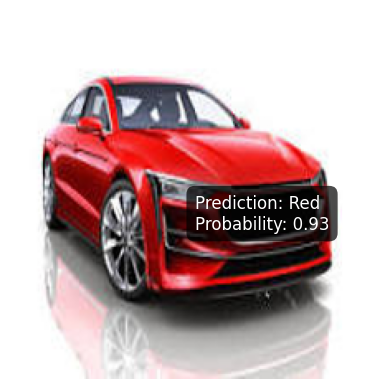

In [25]:
pred_and_plot_quant(tflite_model_path, "/content/images?q=tbn:ANd9GcQqaR5qFkm4NXx2goCoJ0t2xL6lqI58ZrbZOkQA76LegQ&s")